# Análise da diferença salarial para trabalhadores de TI conforme suas ocupações (CBOs).

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme divisão das ocupações específicas selecionadas em um recorte de 2009 e 2019.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [2]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices de resumo do nome das CBOs para :
cbo = {'1236': '1236 - Diretoria', '1425': '1425 - Gerência', 
       '2122': '2122 - Engenharia', '2123': '2123 - Analistas', 
       '2124': '2124 - Técnicos', '3171': '3171 - Suporte', 
       '3172': '3172 - Administradores'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV para 2009 e 2019:

In [3]:
# Leitura da tabela de dados gerais para 2009:
RAIS_GERAL_2009 = pd.read_csv("../data/DATA_RAIS_GERAL_2009.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2009.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [4]:
# Leitura da tabela de dados gerais para 2019:
RAIS_GERAL_2019 = pd.read_csv("../data/DATA_RAIS_GERAL_2019.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2019.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de CBO para utilização correta:

In [5]:
# Convertendo a coluna CBO de int64 para string
RAIS_GERAL_2009['CBO'] = RAIS_GERAL_2009['CBO'].apply(str)
RAIS_GERAL_2019['CBO'] = RAIS_GERAL_2019['CBO'].apply(str)

# Extraindo somente os 4 primeiros caracteres (Família CBO)
RAIS_GERAL_2009['CBO'] = RAIS_GERAL_2009["CBO"].str[0:4]
RAIS_GERAL_2019['CBO'] = RAIS_GERAL_2019["CBO"].str[0:4]

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [6]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2009 (data dos dados para 2009) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2009 = 2.14068130

RAIS_GERAL_2009["Remuneração"] = RAIS_GERAL_2009["Remuneração"] * fator_correcao_inflacao_2009

# Índice de correção de inflação para o período de 12/2019 (data dos dados para 2019) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2019 = 1.22858430

RAIS_GERAL_2019["Remuneração"] = RAIS_GERAL_2019["Remuneração"] * fator_correcao_inflacao_2019

### Exibição das tabelas gerais para cada ano:

In [7]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2009.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,3172,73114,2,21,02,"1,498.48",1
1,AC,3172,73114,2,29,02,"2,140.68",1
2,AC,3172,47717,2,33,02,"2,140.68",1
3,AC,2124,47512,4,29,08,"2,354.75",1
4,AC,1425,47814,6,32,08,"1,806.35",1


In [8]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2019.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,2124,72100,1,20,8,"2,554.23",1
1,MS,2124,10996,1,37,2,"2,242.77",1
2,MS,3172,84116,2,27,8,"1,626.51",1
3,MS,2124,47440,3,35,8,"5,580.60",1
4,MS,3172,62031,3,40,9,"1,847.79",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme ocupações específicas (CBOs):

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [9]:
# Tabela principal para quantidade em 2009:
RAIS_GERAL_2009_QNT = pd.crosstab(RAIS_GERAL_2009["CBO"].replace(cbo), RAIS_GERAL_2009["Sexo"].replace(sexo))
RAIS_GERAL_2009_QNT.insert(1, "% Fem.", RAIS_GERAL_2009_QNT["Fem."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)
RAIS_GERAL_2009_QNT.insert(3, "% Masc.", RAIS_GERAL_2009_QNT["Masc."] / (RAIS_GERAL_2009_QNT["Fem."] + RAIS_GERAL_2009_QNT["Masc."]) * 100)

RAIS_GERAL_2009_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
CBO,,,,
1236 - Diretoria,292,15.43,1601,84.57
1425 - Gerência,3807,20.14,15099,79.86
2122 - Engenharia,409,13.18,2694,86.82
2123 - Analistas,3032,20.08,12064,79.92
2124 - Técnicos,45654,23.64,147485,76.36
3171 - Suporte,31189,33.40,62202,66.60
3172 - Administradores,17703,25.88,50706,74.12


In [10]:
# Tabela principal para quantidade em 2019:
RAIS_GERAL_2019_QNT = pd.crosstab(RAIS_GERAL_2019["CBO"].replace(cbo), RAIS_GERAL_2019["Sexo"].replace(sexo))
RAIS_GERAL_2019_QNT.insert(1, "% Fem.", RAIS_GERAL_2019_QNT["Fem."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)
RAIS_GERAL_2019_QNT.insert(3, "% Masc.", RAIS_GERAL_2019_QNT["Masc."] / (RAIS_GERAL_2019_QNT["Fem."] + RAIS_GERAL_2019_QNT["Masc."]) * 100)

RAIS_GERAL_2019_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
CBO,,,,
1236 - Diretoria,426,15.23,2371,84.77
1425 - Gerência,8411,19.71,34262,80.29
2122 - Engenharia,911,12.17,6572,87.83
2123 - Analistas,4571,18.57,20042,81.43
2124 - Técnicos,64309,20.95,242636,79.05
3171 - Suporte,31805,27.07,85685,72.93
3172 - Administradores,18919,22.88,63759,77.12


In [11]:
# Tabela para gráfico da quantidade em 2009:
RAIS_GERAL_2009_QNT.insert(4, "Total", RAIS_GERAL_2009_QNT["% Masc."] + RAIS_GERAL_2009_QNT["% Fem."])
RAIS_GERAL_2009_QNT.insert(5, "Ano", "2009")

# Tabela para gráfico da quantidade em 2019:
RAIS_GERAL_2019_QNT.insert(4, "Total", RAIS_GERAL_2019_QNT["% Masc."] + RAIS_GERAL_2019_QNT["% Fem."])
RAIS_GERAL_2019_QNT.insert(5, "Ano", "2019")

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2009_QNT, RAIS_GERAL_2019_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

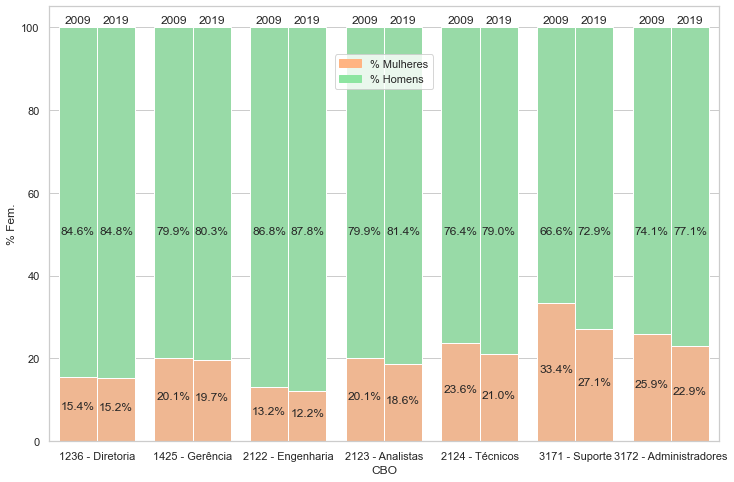

In [12]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize = (12, 8))

# Configuração da grid da imagem:
sns.set(style = "whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x = "CBO", y = "Total", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": color_masc, "2019": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')

# Escrita do valor do ano para cada barra em dupla:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1
    bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"][i]), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x = "CBO", y = "% Fem.", hue = "Ano", data = RAIS_GERAL_QNT_GRAF, palette = {"2009": color_fem,"2019": color_fem})

# Captura das barras recém criadas:
patches = bar2.patches[14:]

# Escrita da porcentagem para cada barra capturada das mulheres:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."][i]), (x, y), ha='center')

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color = color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color = color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc = 'center', bbox_to_anchor = (.45, .8, .1, .1))

plt.savefig("./figures/svg/qnt_sexo_cbo.svg")

## Análise das diferenças salariais conforme cada ocupação específica (CBOs):

### Distribuição da remuneração para cada sexo cruzado pela CBO:

In [13]:
# Criação da tabela para o boxplot para 2009
RAIS_GERAL_2009_BOX = RAIS_GERAL_2009
RAIS_GERAL_2009_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2009_BOX["CBO"].replace(cbo, inplace = True)

RAIS_GERAL_2009_BOX

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,3172 - Administradores,73114,2,21,02,"1,498.48",Masc.
1,AC,3172 - Administradores,73114,2,29,02,"2,140.68",Masc.
2,AC,3172 - Administradores,47717,2,33,02,"2,140.68",Masc.
3,AC,2124 - Técnicos,47512,4,29,08,"2,354.75",Masc.
4,AC,1425 - Gerência,47814,6,32,08,"1,806.35",Masc.
...,...,...,...,...,...,...,...,...
393932,TO,2124 - Técnicos,84116,9,34,{ñ,"8,109.61",Fem.
393933,TO,2124 - Técnicos,84116,9,34,{ñ,"5,756.51",Fem.
393934,TO,2124 - Técnicos,45111,9,23,02,"2,183.49",Fem.
393935,TO,3171 - Suporte,49302,9,39,02,"3,403.92",Fem.


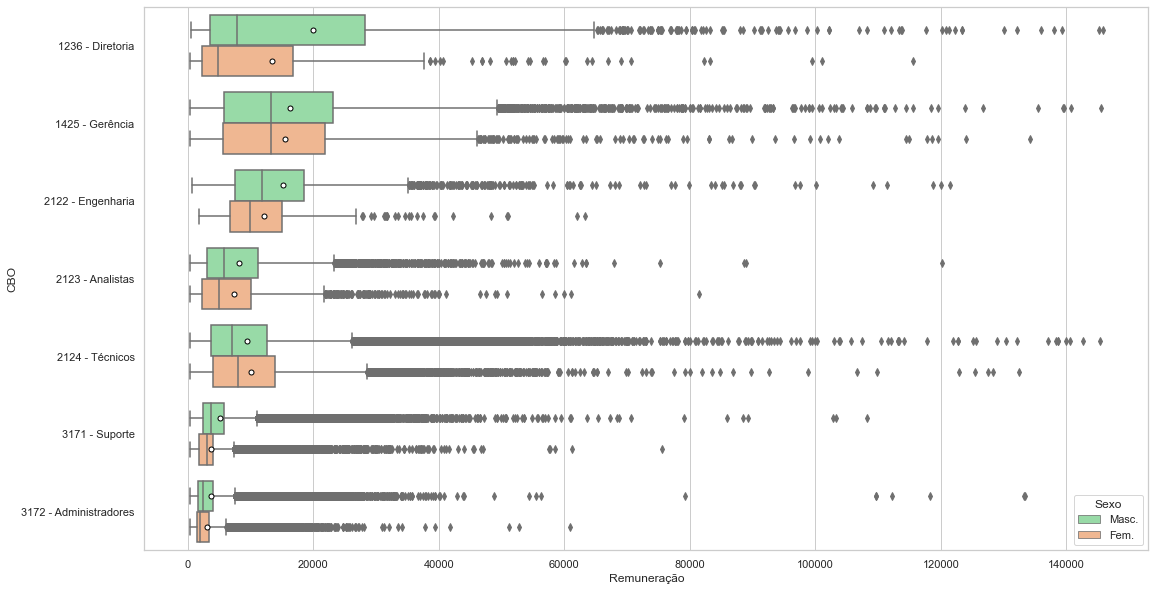

In [14]:
# Criação do boxplot para 2009:
box = sns.boxplot(x = 'Remuneração', y = 'CBO', hue = 'Sexo', data = RAIS_GERAL_2009, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = cbo.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(18, 10)
box.figure.savefig("./figures/png/boxplot_sexo_cbo_2009.png", dpi = 300)

In [15]:
# Criação da tabela para o boxplot para 2019
RAIS_GERAL_2019_BOX = RAIS_GERAL_2019
RAIS_GERAL_2019_BOX["Sexo"].replace(sexo, inplace = True)
RAIS_GERAL_2019_BOX["CBO"].replace(cbo, inplace = True)

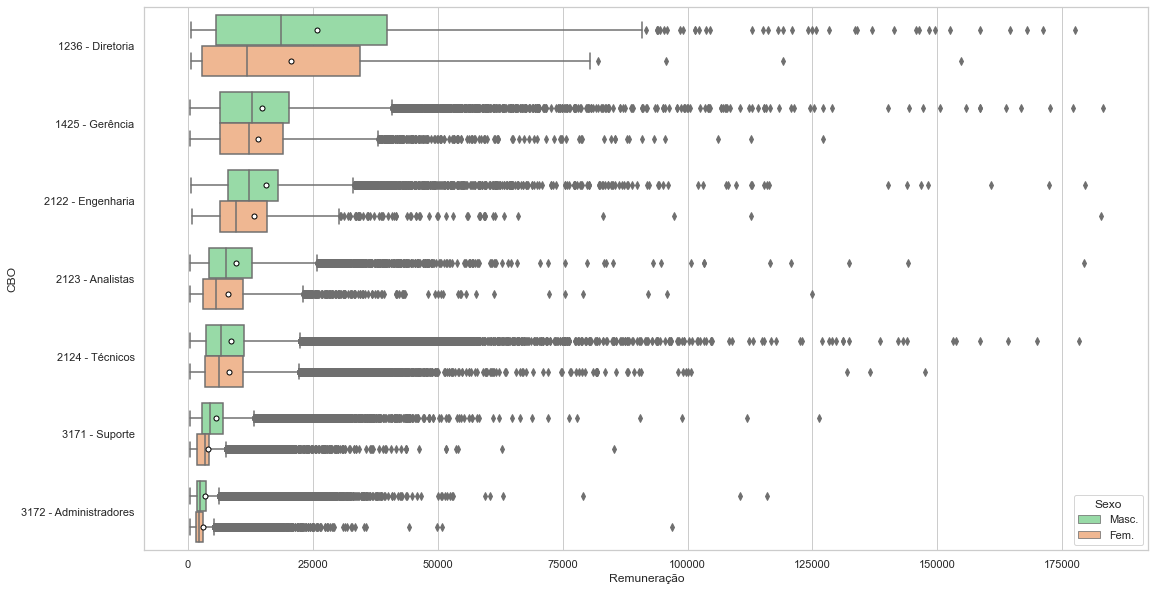

In [16]:
# Criação do boxplot para 2019:
box = sns.boxplot(x = 'Remuneração', y = 'CBO', hue = 'Sexo', data = RAIS_GERAL_2019, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = cbo.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(18, 10)
box.figure.savefig("./figures/png/boxplot_sexo_cbo_2019.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [17]:
# Tabela principal para média e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIA = pd.crosstab(RAIS_GERAL_2009["CBO"].replace(cbo), RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2009_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIA["Fem."] - RAIS_GERAL_2009_MEDIA["Masc."]) / RAIS_GERAL_2009_MEDIA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1236 - Diretoria,"13,494.35","19,890.41",-32.16
1425 - Gerência,"15,541.75","16,337.04",-4.87
2122 - Engenharia,"12,169.73","15,201.67",-19.94
2123 - Analistas,"7,382.06","8,236.94",-10.38
2124 - Técnicos,"10,031.04","9,463.14",6.00
3171 - Suporte,"3,701.75","5,076.89",-27.09
3172 - Administradores,"3,071.28","3,630.37",-15.40


In [18]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIA = pd.crosstab(RAIS_GERAL_2019["CBO"].replace(cbo), RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2019_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIA["Fem."] - RAIS_GERAL_2019_MEDIA["Masc."]) / RAIS_GERAL_2019_MEDIA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1236 - Diretoria,"20,573.68","25,899.04",-20.56
1425 - Gerência,"14,057.73","14,824.12",-5.17
2122 - Engenharia,"13,199.75","15,614.86",-15.47
2123 - Analistas,"8,032.70","9,553.76",-15.92
2124 - Técnicos,"8,256.48","8,576.87",-3.74
3171 - Suporte,"4,020.92","5,656.51",-28.92
3172 - Administradores,"2,956.41","3,434.03",-13.91


In [19]:
RAIS_GERAL_2009_MEDIA.insert(3, "Ano", "2009")

RAIS_GERAL_2019_MEDIA.insert(3, "Ano", "2019")

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIA, RAIS_GERAL_2019_MEDIA]).reset_index()

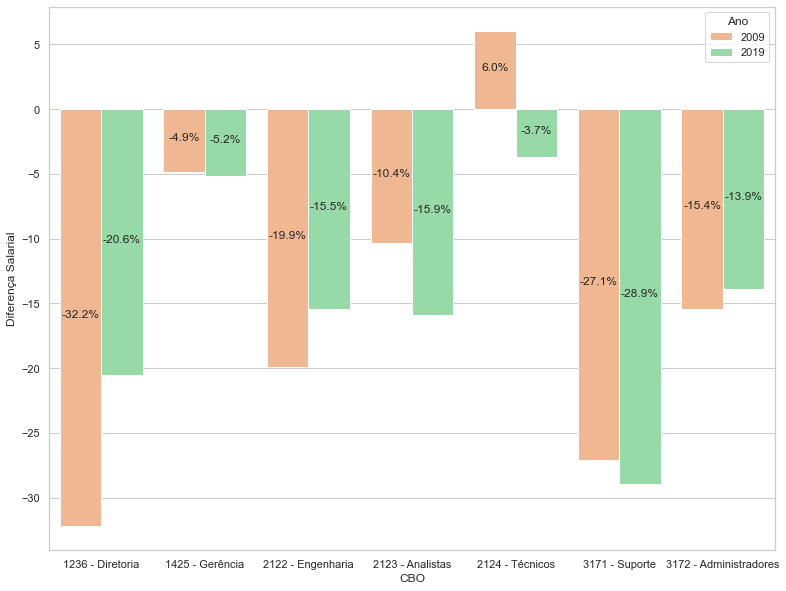

In [20]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "CBO", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2009": color_fem,"2019": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("./figures/svg/dif_salarial_sexo_cbo_media.svg")


In [21]:
# Tabela principal para mediana e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIANA = pd.crosstab(RAIS_GERAL_2009["CBO"].replace(cbo), RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'median')
RAIS_GERAL_2009_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIANA["Fem."] - RAIS_GERAL_2009_MEDIANA["Masc."]) / RAIS_GERAL_2009_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1236 - Diretoria,"4,856.14","7,830.59",-37.99
1425 - Gerência,"13,212.18","13,341.00",-0.97
2122 - Engenharia,"9,924.84","11,834.37",-16.14
2123 - Analistas,"4,975.46","5,726.32",-13.11
2124 - Técnicos,"7,971.07","7,070.20",12.74
3171 - Suporte,"3,090.84","3,747.95",-17.53
3172 - Administradores,"1,978.16","2,403.67",-17.70


In [22]:
# Tabela principal para mediana e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIANA = pd.crosstab(RAIS_GERAL_2019["CBO"].replace(cbo), RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'median')
RAIS_GERAL_2019_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIANA["Fem."] - RAIS_GERAL_2019_MEDIANA["Masc."]) / RAIS_GERAL_2019_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1236 - Diretoria,"11,893.71","18,721.17",-36.47
1425 - Gerência,"12,284.44","12,814.60",-4.14
2122 - Engenharia,"9,676.34","12,204.58",-20.72
2123 - Analistas,"5,658.37","7,612.60",-25.67
2124 - Técnicos,"6,200.81","6,672.50",-7.07
3171 - Suporte,"3,458.24","4,339.41",-20.31
3172 - Administradores,"2,160.54","2,457.17",-12.07


In [23]:
RAIS_GERAL_2009_MEDIANA.insert(3, "Ano", "2009")

RAIS_GERAL_2019_MEDIANA.insert(3, "Ano", "2019")

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2009_MEDIANA, RAIS_GERAL_2019_MEDIANA]).reset_index()

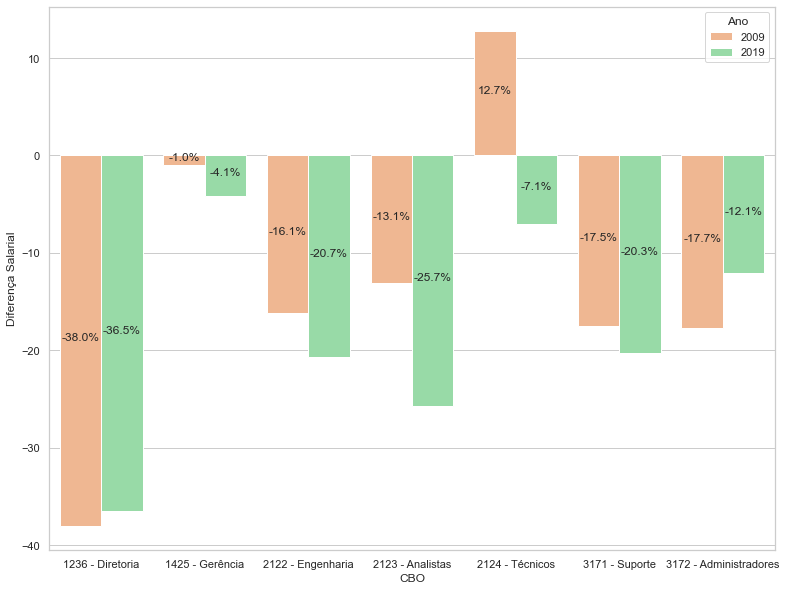

In [24]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "CBO", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2009": color_fem,"2019": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("./figures/svg/dif_salarial_sexo_cbo_mediana.svg")

### Teste de hipótese para cada grupo de médias por CBOs:

In [25]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [26]:
TESTE_HIP_2009 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2009.query("Sexo == 'Masc.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2009.query("Sexo == 'Fem.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2009.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2009_HIP = pd.merge(RAIS_GERAL_2009_MEDIA, TESTE_HIP_2009, left_index=True, right_index=True)
RAIS_GERAL_2009_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2009_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
CBO,,,,,
1236 - Diretoria,"13,494.35","19,890.41",184488.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
1425 - Gerência,"15,541.75","16,337.04",27938756.0,0.01 > 0.00384...,Medianas estatisticamente diferentes
2122 - Engenharia,"12,169.73","15,201.67",467634.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
2123 - Analistas,"7,382.06","8,236.94",16365404.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
2124 - Técnicos,"10,031.04","9,463.14",3178232492.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
3171 - Suporte,"3,701.75","5,076.89",734007545.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
3172 - Administradores,"3,071.28","3,630.37",380332191.5,0.01 > 0.00000...,Medianas estatisticamente diferentes


In [27]:
TESTE_HIP_2019 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2019.query("Sexo == 'Masc.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2019.query("Sexo == 'Fem.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2019.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2019_HIP = pd.merge(RAIS_GERAL_2019_MEDIA, TESTE_HIP_2019, left_index=True, right_index=True)
RAIS_GERAL_2019_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2019_HIP.head(7)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
CBO,,,,,
1236 - Diretoria,"20,573.68","25,899.04",418567.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
1425 - Gerência,"14,057.73","14,824.12",139609661.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
2122 - Engenharia,"13,199.75","15,614.86",2471839.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
2123 - Analistas,"8,032.70","9,553.76",38213520.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
2124 - Técnicos,"8,256.48","8,576.87",7514448767.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
3171 - Suporte,"4,020.92","5,656.51",965723371.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
3172 - Administradores,"2,956.41","3,434.03",518731392.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
